<a href="https://colab.research.google.com/github/ashish29cs/Prediction-of-Stock-Price-Movement-based-on-trading-DS-II/blob/main/MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#reading the dataset
data = pd.read_csv('MSFT.csv')
print(data.shape) # printing the shape of the data (rows,columns)
data.head() # print the first five rows of data

(8857, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [6]:
data.columns = data.columns.str.upper()
data.head() ###print the updated cleaned dataset

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


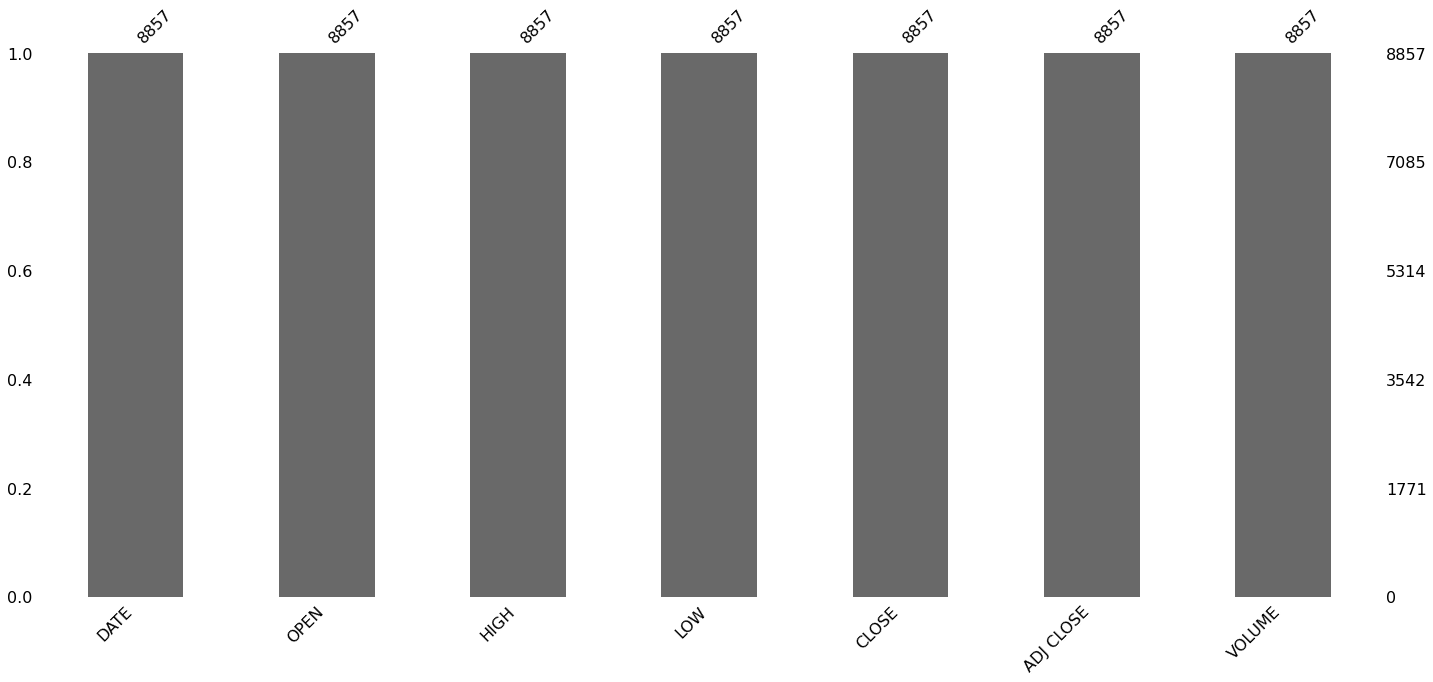

In [7]:
import missingno as msno
msno.bar(data)

In [8]:
data[data.duplicated()]##check for duplicate entries

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME


In [9]:
# Basic Description about every attributes in the data
data.describe()

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       8857 non-null   object 
 1   OPEN       8857 non-null   float64
 2   HIGH       8857 non-null   float64
 3   LOW        8857 non-null   float64
 4   CLOSE      8857 non-null   float64
 5   ADJ CLOSE  8857 non-null   float64
 6   VOLUME     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [11]:
data['Profit/Loss']=data['OPEN']-data['CLOSE']
data['Max_Profit']=data['HIGH']-data['LOW']
data.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,Profit/Loss,Max_Profit
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,-0.008680,0.013021
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,-0.003472,0.005209
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,-0.001737,0.002605
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,0.002605,0.004341
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,0.001736,0.003472


In [12]:
data= data.set_index(['DATE'])

In [13]:
features = ['OPEN', 'HIGH', 'LOW', 'CLOSE' , 'ADJ CLOSE' , 'VOLUME' , 'Profit/Loss' , 'Max_Profit']
list(enumerate(features))

[(0, 'OPEN'),
 (1, 'HIGH'),
 (2, 'LOW'),
 (3, 'CLOSE'),
 (4, 'ADJ CLOSE'),
 (5, 'VOLUME'),
 (6, 'Profit/Loss'),
 (7, 'Max_Profit')]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

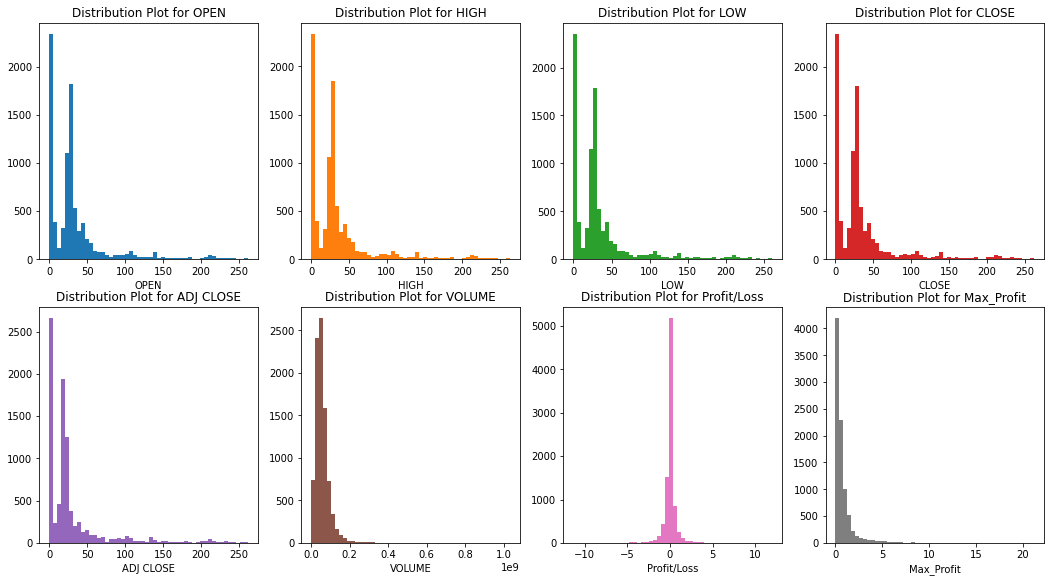

In [15]:
plt.figure(figsize=(18,20))
for i in enumerate(features):                         #DISTRIBUTION PLOT FOR ALL ATTRIBUTES
    plt.subplot(4,4,i[0]+1)
    base_color = sns.color_palette()[i[0]]            
    sns.distplot(x = data[i[1]] , kde = False , color = base_color , hist_kws={'alpha':1});
    plt.xlabel(i[1])
    plt.title(f'Distribution Plot for {i[1]}')

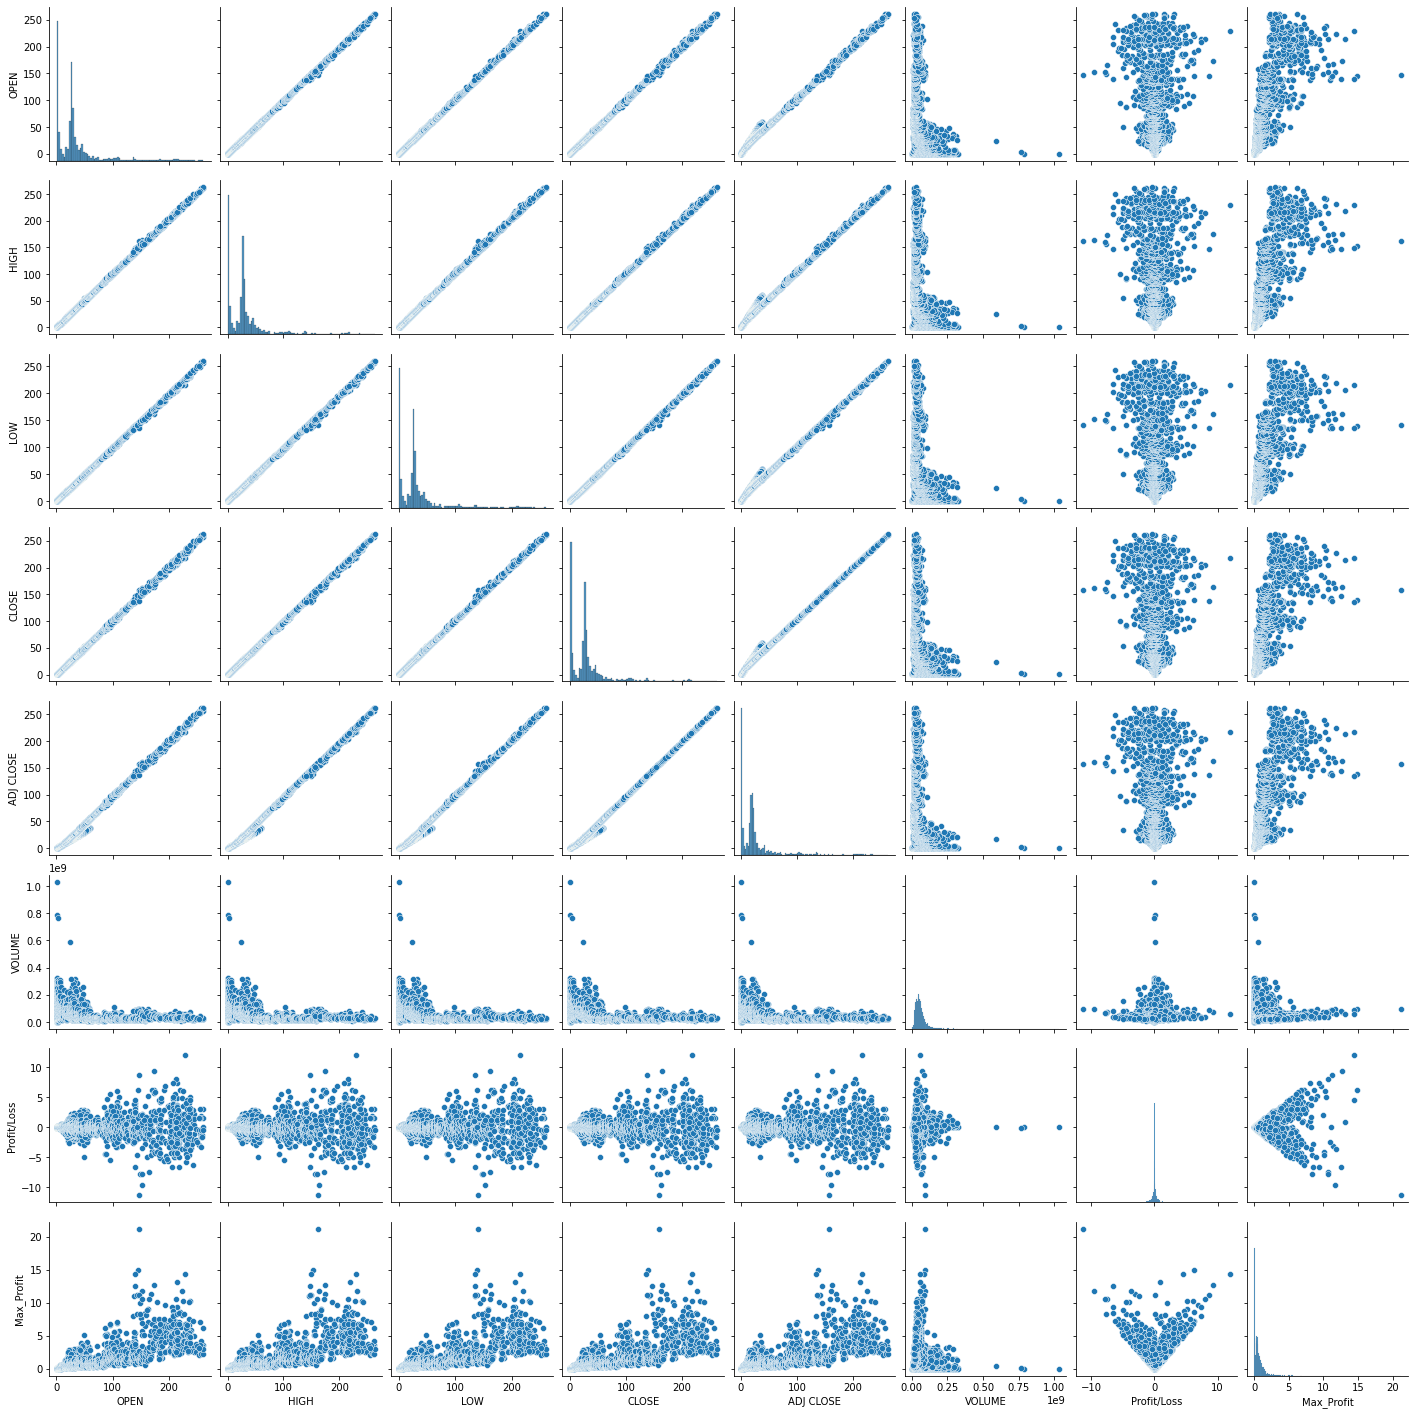

In [16]:
sns.pairplot(data = data)   #SCATTER PLOT BETWEEN EACH ATTRIBUTES

Text(0.5, 0, 'DATE')

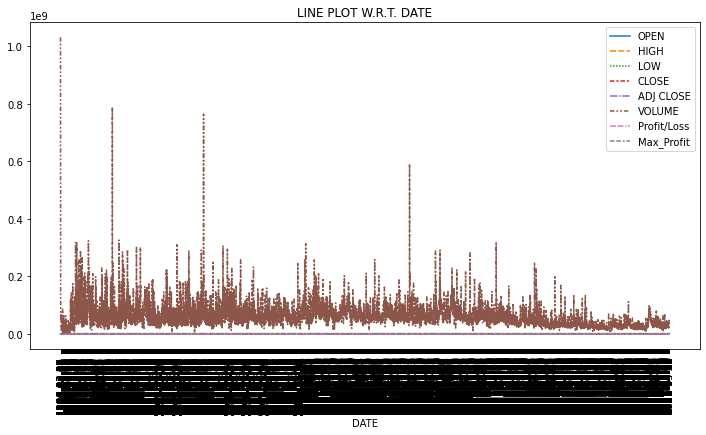

In [17]:
plt.figure(figsize = (12 , 6))
sns.lineplot(data = data)
plt.xticks(rotation = 90);                   #LINE PLOT FOR ALL ATTRIBUTE ACC. TO DATE
plt.title("LINE PLOT W.R.T. DATE")
plt.xlabel("DATE")

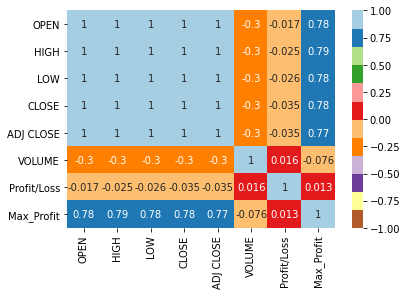

In [18]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True , cmap = 'Paired_r') #HEATMAP FOR CORRELATION B/W ATTRIBUTES

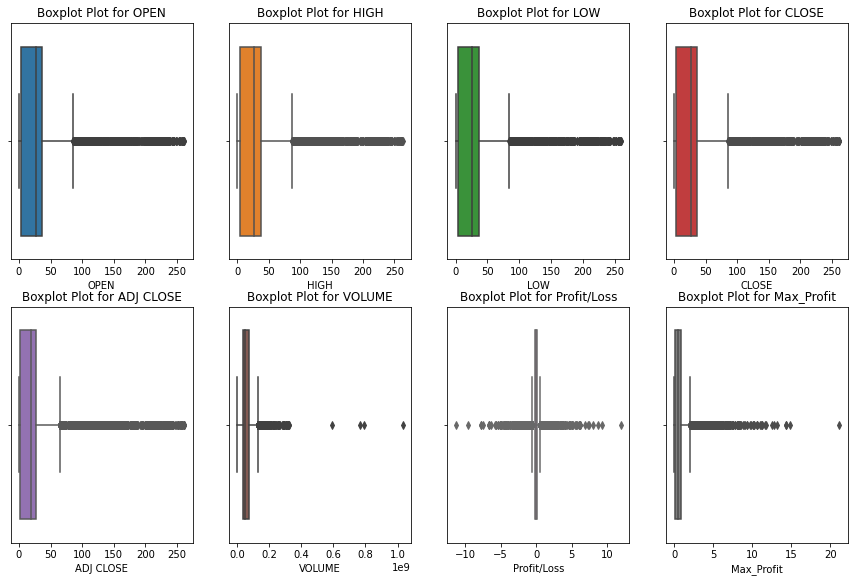

In [19]:
plt.figure(figsize=(15,20))
for i in enumerate(features):
    plt.subplot(4,4,i[0]+1)                             #BOX PLOT FOR EACH ATTRIBUTES
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = data[i[1]] , color = base_color);
    plt.title(f'Boxplot Plot for {i[1]}')

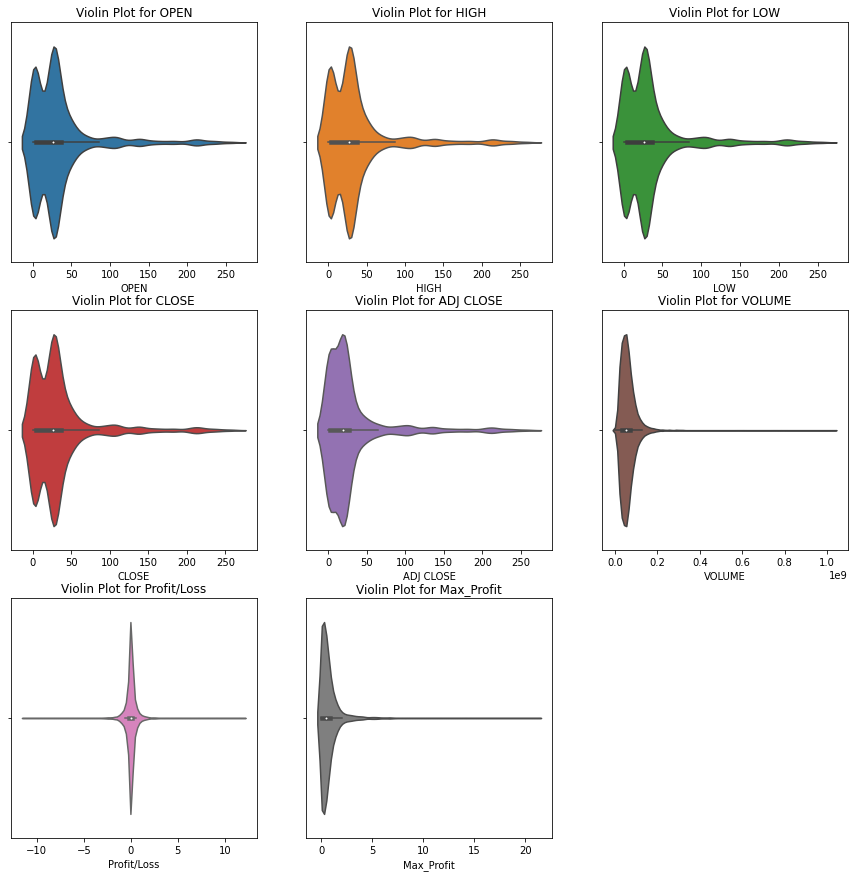

In [20]:
plt.figure(figsize=(15,15))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)                               #VIOLIN PLOT FOR ALL ATTRIBUTES
    base_color = sns.color_palette()[i[0]]
    sns.violinplot(x = data[i[1]] , kde = False , color = base_color);
    plt.title(f'Violin Plot for {i[1]}')

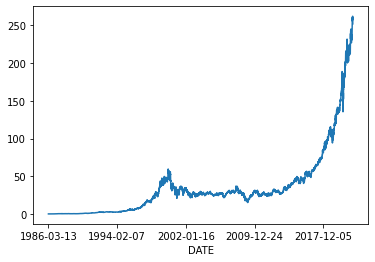

In [21]:
data['CLOSE'].plot()

In [22]:
X=data.drop(['CLOSE'],axis=1)
X=X.drop(['ADJ CLOSE'],axis=1)

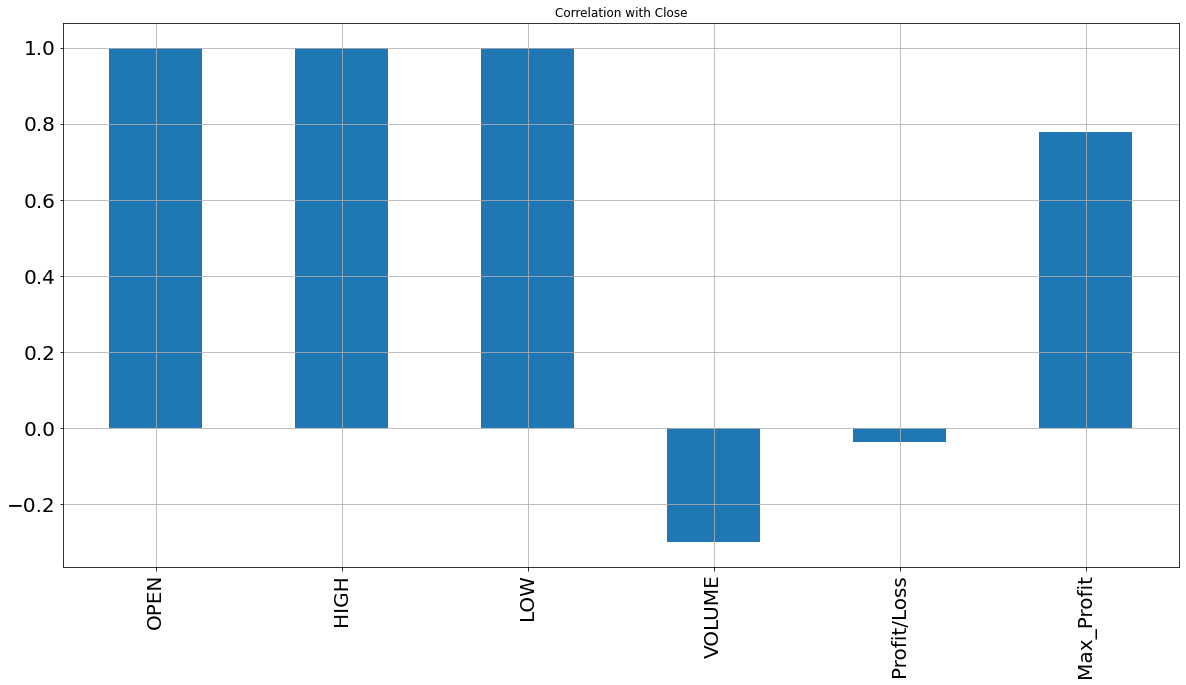

In [23]:
X.corrwith(data['CLOSE']).plot.bar(
        figsize = (20, 10), title = "Correlation with Close", fontsize = 20,
        rot = 90, grid = True)



In [24]:
test = data
# Target column
target_close = pd.DataFrame(test['CLOSE'])
display(test.head())

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,Profit/Loss,Max_Profit
DATE,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,-0.008680,0.013021
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,-0.003472,0.005209
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,-0.001737,0.002605
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,0.002605,0.004341
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,0.001736,0.003472


In [25]:


# selecting Feature Columns
feature_columns = ['OPEN', 'HIGH', 'LOW', 'VOLUME']


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()



,OPEN,HIGH,LOW,VOLUME
DATE,,,,
1986-03-13,0.000000,0.000036,0.000000,1.000000
1986-03-14,0.000033,0.000040,0.000033,0.297096
1986-03-17,0.000046,0.000043,0.000047,0.127119
1986-03-18,0.000053,0.000043,0.000040,0.063588
1986-03-19,0.000043,0.000033,0.000033,0.044285


In [27]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_close.shift(-1)
validation_y = target_close[-90:-1]
target_close = target_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_close.shape)
display(target_close.tail())

,OPEN,HIGH,LOW,VOLUME
DATE,,,,
1986-03-13,0.000000,0.000036,0.000000,1.000000
1986-03-14,0.000033,0.000040,0.000033,0.297096
1986-03-17,0.000046,0.000043,0.000047,0.127119
1986-03-18,0.000053,0.000043,0.000040,0.063588
1986-03-19,0.000043,0.000033,0.000033,0.044285


Shape of features :  (8857, 4)
Shape of target :  (8857, 1)


,OPEN,HIGH,LOW,VOLUME
DATE,,,,
2021-04-26,1.000000,0.997149,1.000000,0.016959
2021-04-27,0.999694,1.000000,0.999808,0.027888
2021-04-28,0.978667,0.974724,0.972239,0.043322
2021-04-29,0.976297,0.973052,0.957052,0.037189
2021-04-30,0.954429,0.961573,0.959359,0.027805


,CLOSE
DATE,
2021-04-26,261.549988
2021-04-27,261.970001
2021-04-28,254.559998
2021-04-29,252.509995
2021-04-30,252.179993



 -----After process------ 

Shape of features :  (8767, 4)
Shape of target :  (8767, 1)


,CLOSE
DATE,
2020-12-15,214.130005
2020-12-16,219.279999
2020-12-17,219.419998
2020-12-18,218.589996
2020-12-21,222.589996


In [28]:
from sklearn.model_selection import TimeSeriesSplit

In [29]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_close[:len(train_index)].values.ravel(), target_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [30]:
X_train.shape,X_test.shape



((7970, 4), (797, 4))

In [31]:
y_train.shape,y_test.shape

((7970,), (797,))

In [58]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_tst_t = X_test.reshape(X_test.shape[0], X_test.shape[1],1)


In [44]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=( X_train.shape[1],1), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
997/997 [==============================] - 5s 3ms/step - loss: 3.1018
Epoch 2/200
997/997 [==============================] - 3s 3ms/step - loss: 176.3842
Epoch 3/200
997/997 [==============================] - 3s 3ms/step - loss: 101.1882
Epoch 4/200
997/997 [==============================] - 3s 3ms/step - loss: 64.9086
Epoch 5/200
997/997 [==============================] - 3s 3ms/step - loss: 32.3685
Epoch 6/200
997/997 [==============================] - 3s 3ms/step - loss: 20.5124
Epoch 7/200
997/997 [==============================] - 3s 3ms/step - loss: 17.1700
Epoch 8/200
997/997 [==============================] - 3s 3ms/step - loss: 12.4970
Epoch 9/200
997/997 [==============================] - 3s 3ms/step - loss: 8.2984
Epoch 10/200
997/997 [==============================] - 3s 3ms/step - loss: 6.2919
Epoch 11/200
997/997 [==============================] - 3s 3ms/step - loss: 5.1752
Epoch 12/200
997/997 [==============================] - 3s 3ms/step - loss: 4.5817
Epoc

In [45]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.997
The R2 score on the Test set is:	0.924


In [48]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,y_train_pred_lstm))

0.9376776608336092

In [49]:
math.sqrt(mean_squared_error(y_test,y_pred_test_lstm ))

11.603451247975388

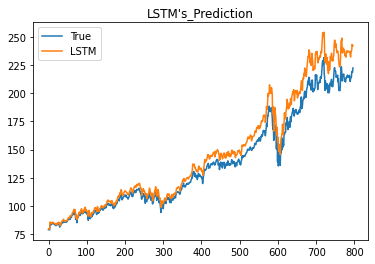

In [50]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.legend()
plt.show()

In [51]:
from keras.layers import GRU
from keras.layers import Dense
from keras.optimizers import SGD

In [52]:
regressorGRU = Sequential()
#  GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))


# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')


In [53]:
regressorGRU.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f5b249ffed0>>

In [54]:
regressorGRU.fit(X_tr_t, y_train, epochs=100, batch_size=32)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 262.1396
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 1.3646
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3664
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5850
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2850
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3228
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3173
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3898
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3138
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3465
Epoch 11/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4282
Epoch 12/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2911
Epoch 13/10

In [59]:
y_pred_test= model_lstm.predict(X_tst_t)
y_train_pred= model_lstm.predict(X_tr_t)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
r2_train = r2_score(y_train, y_train_pred)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)

The R2 score on the Train set is:	0.997
The R2 score on the Test set is:	0.924
